In [1]:
%load_ext autoreload
%autoreload 2

# Get parent root directory and add to sys.path
import sys, os
parent_dir = os.path.dirname(os.getcwd())
sys.path.append(parent_dir)

# Require ipympl
%matplotlib widget 

In [2]:
from src.rocket import Rocket
from src.pos_rocket_vis import *
from nmpc_land import NmpcCtrl, NmpcCtrl_Tuned1
import numpy as np

rocket_obj_path = os.path.join(parent_dir, "Cartoon_rocket.obj")
rocket_params_path = os.path.join(parent_dir,"rocket.yaml")

# Rocket setup
Ts  = 1/20
rocket = Rocket(Ts=Ts, model_params_filepath=rocket_params_path)
rocket.mass = 1.7 # Do not change!!!

# Visualization setup
vis = RocketVis(rocket, rocket_obj_path)
vis.anim_rate = 1


In [3]:
sim_time = 8 # simulation length in seconds
x0 = np.zeros(12) # w, phi, v, p
x0[5] = np.deg2rad(30.0) #roll
x0[9] = 3.0 # x
x0[10] = 2.0 # y
x0[11] = 10.0 # z

x_ref = np.zeros(12)
x_ref[5] = 0.0
x_ref[9] = 1.0
x_ref[10] = 0.0
x_ref[11] = 3.0

xs, us = rocket.trim(x_ref)
print("Linearization around a steady state:")
print("x_ref = ", x_ref)
print("xs = ", xs)
print("us = ", us)

H = 2 # horizon time 
#nmpc = NmpcCtrl(rocket, H, xs, us)
nmpc = NmpcCtrl_Tuned1(rocket, H, xs, us)





******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit https://github.com/coin-or/Ipopt
******************************************************************************

Linearization around a steady state:
x_ref =  [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 3.]
xs =  [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 3.]
us =  [ 0.          0.         56.66666667  0.        ]


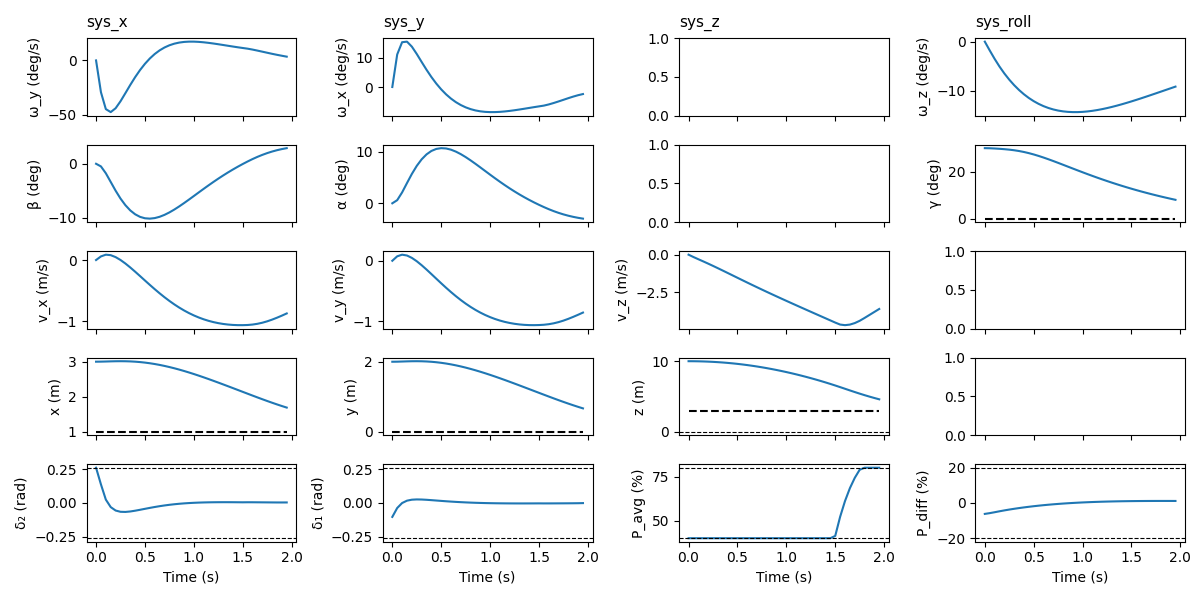

In [4]:
# Open-loop
u0, x_ol, u_ol, t_ol = nmpc.get_u(t0=0.0, x0=x0)
plot_static_states_inputs(t_ol[:-1], x_ol[:, :-1], u_ol, xs)
plt.savefig("NMPC_open_loop_states_inputs.pdf", bbox_inches="tight")

Simulating time 0.00

 State alpha violation: 0.18 > 0.17, 
 State alpha violation: 0.18 > 0.17, 
 State beta violation: -0.18 < -0.17, 
 State alpha violation: 0.19 > 0.17, 
 State beta violation: -0.18 < -0.17, 
 State alpha violation: 0.19 > 0.17, 
 State beta violation: -0.18 < -0.17, 
 State alpha violation: 0.18 > 0.17, 
 State alpha violation: 0.18 > 0.17, Simulating time 1.00
Simulating time 2.00
Simulating time 3.00
Simulating time 4.00
Simulating time 5.00
Simulating time 6.00
Simulating time 7.00


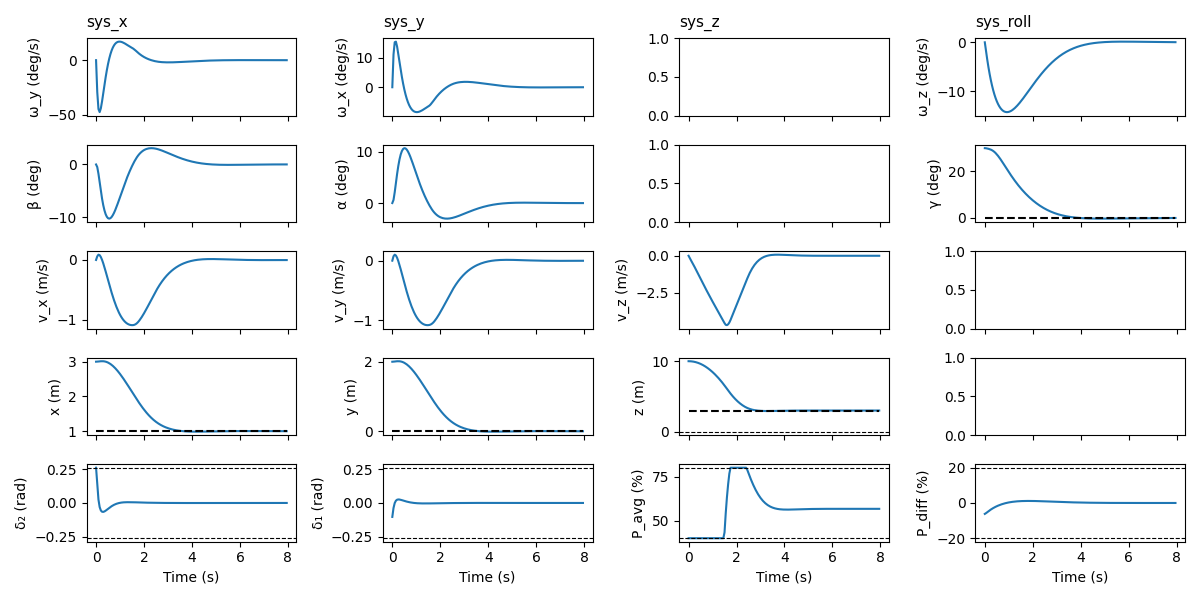

In [4]:
# Closed-loop
t_cl, x_cl, u_cl, t_ol, x_ol, u_ol = rocket.simulate_land(nmpc, sim_time, H, x0)
plot_static_states_inputs(t_cl[:-1], x_cl[:, :-1], u_cl, xs)
plt.savefig("NMPC_closedloop_states_inputs.pdf", bbox_inches="tight")


In [5]:
vis.animate(t_cl[:-1], x_cl[:,:-1], u_cl, T_ol=t_ol[...,:-1], X_ol=x_ol, U_ol=u_ol)
#plot_static_states_inputs(t_cl[:-1], x_cl[:,:-1], u_cl, xs)

AppLayout(children=(HBox(children=(Play(value=0, description='Press play', max=159, step=2), IntSlider(value=0…

{'fig': <Figure size 640x480 with 16 Axes>,
 'axes': [<Axes: ylabel='inputs'>,
  <Axes: >,
  <Axes: >,
  <Axes: >,
  <Axes: title={'center': 'Subsystem Y'}>,
  <Axes: title={'center': 'Subsystem X'}, ylabel='$\\omega_{\\phi\\theta\\psi}$ (deg/s)'>,
  <Axes: title={'center': 'Subsystem Z'}>,
  <Axes: >,
  <Axes: ylabel='$\\phi\\theta\\psi$ (deg)'>,
  <Axes: title={'center': 'Subsystem Roll'}>,
  <Axes: ylabel='$v_{\\text{ENU}}$ (m/s)'>,
  <Axes: >,
  <Axes: >,
  <Axes: ylabel='$\\text{pos}_{\\text{ENU}}$ (m)'>,
  <Axes: >,
  <Axes: >],
 'plotter': <pyvista.plotting.plotter.Plotter at 0x17483fa40>,
 'scene_objects': {'rocket_actor': Actor (0x174a521a0)
    Center:                     (3.060356440456486, 1.7874210169066358, 10.5884845)
    Pickable:                   True
    Position:                   (0.0, 0.0, 0.0)
    Scale:                      (1.0, 1.0, 1.0)
    Visible:                    True
    X Bounds                    1.998E+00, 4.122E+00
    Y Bounds                    7.